# 以公開資料分析台中市政府交通局交通政策之成果

## 一、研究動機與目的

交通無非是人們生活的重要一環，而交通政策自然更與你我日常息息相關。筆者擬以台中市政府發佈之2015-2018年交通局施政白皮書為出發點，並將政府開放資料平台提供之相關數據進行分析，以期了解交通政策之施行結果是否反映於人民的生活之中。

## 二、研究方法

由政府資料開放平臺獲取台中市公車月運量數據以及交通事故詳細資料，並以Pyhton進行數據分析，觀察數據的變化趨勢，並得出結論。

## 三、研究限制

政府資料開放平臺上僅提供105年11月後之詳細交通事故資料，時間跨度較小，或無法反映交通政策執行結果於數據中之長期變化趨勢。

## 四、正文

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from requests_html import HTMLSession

### 2015-2018年臺中市政府交通局施政白皮書

筆者以requests模組擷取2015-2018年臺中市政府交通局施政白皮書中，此次報告欲分析之部分，內容聚焦於大眾運輸、自行車使用，以及行人安全。

In [2]:
session = HTMLSession()
response = session.get('https://www.traffic.taichung.gov.tw/content/index.asp?Parser=1,5,420#_Toc414605011')
a=response.html.text
print(a[5663:5673],"\n")
print(a[2044:2058],"\n")
print(a[5689:6188])
print(a[2059:2073],"\n")
print(a[6417:6816],"\n")
print(a[(a.index("發展策略四：健全複合公共運輸")):(a.index("複合公共運輸")+6)],"\n")
print(a[(a.index("具體措施2：公共運輸發展計畫")):(a.index("進而帶動整體公共運輸市佔率，提昇本市公共運輸服務品質。"))+len("進而帶動整體公共運輸市佔率，提昇本市公共運輸服務品質。")])

發展策略及具體措施： 

發展策略一：建構永續安全路網 

交通安全很重要，但往往執政者不會花足夠的預算投入交通安全的提升與改善，因為它的效果是隱性的，但既然重要就應該去做，況且臺中市交通安全與其它各縣市比較起來排名均為後段班，還有很多須努力的地方，所以我們提出「消除危險易肇事路段路口，提升全體市民行的安全」、「相容性低的運具分流，減少混合車流衝突」。
具體措施1：安全路口交通工程計畫
有別以往利用肇事斑點圖來分析路口交通事故型態，本局引用插示圖方法及理論分析本市易肇事路口事故型態，針對事故原因以預防方式設置相關交通設施，減少潛在肇事因素，提升路口交通安全，將易肇事路口改善為安全路口。本計畫透過新的理論及作法，檢討與分析路口多事故發生原因，針對每個原因以預防事故角度提出改善策略，並對工程面策略落實改善，以期更有效改善多事故路口並提升交通安全。
具體措施2：汽機車分流交通工程計畫
針對本市轄區內易肇事之無號誌化路口加強機車分流號誌、標誌標線之規劃設置，期以明確機車分流，改善路口二段式左轉、待轉區、停等區及路段設置機車優先道、專用道或車道顏色管理等「汽機車分流」措施，或機車自撞路段安全改善措施以提供用路人明確的路權資訊，增進行車秩序與行車安全。

發展策略二：落實人本綠色交通 

具體措施1：人本道路空間推動計畫
為建立以人為本之優質生活環境，辦理本市轄內道路行人安全設施、交通號誌標誌、標線之維護改善及汰舊換新，以提供行人用路人安全及必要之指示資訊，維護交通安全。
另本市人行道因公共設施帶，往往導致「人行淨空間」寬度不足1.5M，期透過調查現有本市人行道現況及人行淨空間寬度，據以研擬改善方案，交由本府人行道主管機關建設局辦理施工改善，以改善人行道系統。
具體措施2：臺中市自行車道串連計畫
推廣民眾騎乘自行車作為短程接駁交通工具，將現有之自行車道里程數425.7公里擴建為600公里，並使之各路口完整串聯，逐步構建自行車道路網，期藉由市區自行車道路網搭配自行車租賃站服務，鼓勵民眾使用無能耗、零汙染的公共自行車作為短程接駁運具，減少及移轉私人機動車輛之持有及使用，打造便捷完善的綠色大眾運輸環境，建構臺中市低碳樂活城市，以落實建構「大臺中市低碳城市，發展綠色經濟與生活。」 

發展策略四：健全複合公共運輸 

具體措施2：公共運輸發展計畫
為吸引民眾使用大眾運輸服務，培養其乘車

### 2015.1-2016.12公車運量變化趨勢

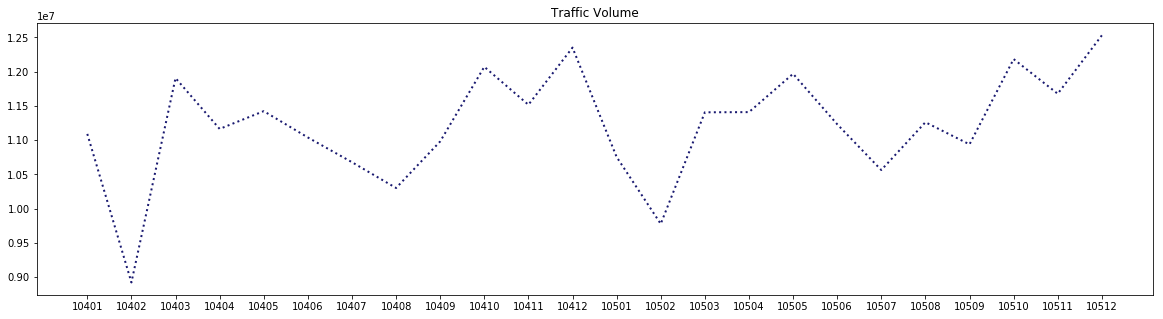

In [3]:
url = 'http://datacenter.taichung.gov.tw/swagger/OpenData/d1857459-9f57-4ca1-aa82-90398062a665'
bus = pd.read_csv(url)
bus=bus[48:-1]
x = [str(i) for i in bus['年月']]
y = bus['月運量']
plt.figure(figsize=(20, 5))
plt.title('Traffic Volume')
plt.plot(x, y, color='midnightblue', linewidth=2.0, linestyle=':')
plt.show()

### 公車月運量前五筆資料

In [4]:
bus.head()

,年月,月運量
48,10401,11091470.0
49,10402,8923494.0
50,10403,11906619.0
51,10404,11164531.0
52,10405,11423885.0


### 公車月運量數據觀察

台中市政府交通局於於104年7月推動「10公里免費公車」計畫，並提及將積極研擬各項轉乘策略，鼓勵民眾轉乘時使用電子票證搭乘各公共運具，以期帶動整體公共運輸市佔率。於104年1月至105年12月之公車月運量折線圖中，筆者發現於此段期間公車運量雖沒有顯著的成長，但大致呈現上升的趨勢。105年4月後，相對極小值皆並未低於歷史低點。不過此次分析較可惜的是，筆者並無法取得實施免費公車計畫前後之月運量資料，或許能察覺更明顯的運量成長。

### 2016.11-2018.5 自行車事故件數變化趨勢

In [5]:
#10511
url1 = 'http://datacenter.taichung.gov.tw/swagger/OpenData/09745899-bb25-42ad-b6c5-5a3d13c3d68c'
data1 = pd.read_csv(url1, encoding='utf-8')
cars10511 = data1.groupby("車種").size()
#10601
url2 = '/Users/deanchu/Documents/X-Village/X-Village-Python-Programming---HW2/10601.csv'
data2 = pd.read_csv(url2, encoding='utf-8')
cars10601 = data2.groupby("車種").size()
#10603
url3 = 'http://datacenter.taichung.gov.tw/swagger/OpenData/8ebf7b41-f0d5-4bc0-8e13-2417d51b3588'
data3 = pd.read_csv(url3, encoding='utf-8')
cars10603 = data3.groupby("車種").size()

In [6]:
#10605
url4 = 'http://datacenter.taichung.gov.tw/swagger/OpenData/06d433ea-ec1b-4949-beff-f67e80e93d66'
data4 = pd.read_csv(url4, encoding='utf-8')
cars10605 = data4.groupby("車種").size()
#10606
url99 = 'http://datacenter.taichung.gov.tw/swagger/OpenData/1a5b0451-7c48-4980-84fd-c756b3e88359'
data99 = pd.read_csv(url99, encoding='utf-8')
cars10606 = data99.groupby("車種").size()
#10610
url5 = 'http://datacenter.taichung.gov.tw/swagger/OpenData/4a87ca30-e831-4b32-aeaf-0b6007de249f'
data5 = pd.read_csv(url5, encoding='big5')
cars10610 = data5.groupby("車種").size()

In [7]:
#10612
url9 = 'http://datacenter.taichung.gov.tw/swagger/OpenData/03f31bd6-59b7-4c99-bbc3-176591cc83d8'
data9 = pd.read_csv(url9, encoding='big5')
cars10612 = data9.groupby("車種").size()
#10701
url6 = 'http://datacenter.taichung.gov.tw/swagger/OpenData/7e0276ba-b939-44e8-b689-b35658f4c6c5'
data6 = pd.read_csv(url6, encoding='big5')
cars10701 = data6.groupby("車種").size()
#10702
url12 = 'http://datacenter.taichung.gov.tw/swagger/OpenData/0bb4b1b0-f63e-4f73-9b1b-cab6f90e779f'
data12 = pd.read_csv(url12, encoding='big5')
cars10702 = data12.groupby("車種").size()

In [8]:
#10703
url7 = 'http://datacenter.taichung.gov.tw/swagger/OpenData/a7e9fecf-48ba-49b4-8d59-b891fc59b52f'
data7 = pd.read_csv(url7, encoding='big5')
cars10703 = data7.groupby("車種").size()
#10704
url10 = 'http://datacenter.taichung.gov.tw/swagger/OpenData/4546b653-c855-4d5c-b599-12a6266ca6cc'
data10 = pd.read_csv(url10, encoding='big5')
cars10704 = data10.groupby("車種").size()
#10705
url8 = 'http://datacenter.taichung.gov.tw/swagger/OpenData/14fe0783-380c-4a54-89fb-7819dd0d5978'
data8 = pd.read_csv(url8, encoding='big5')
cars10705 = data8.groupby("車種").size()

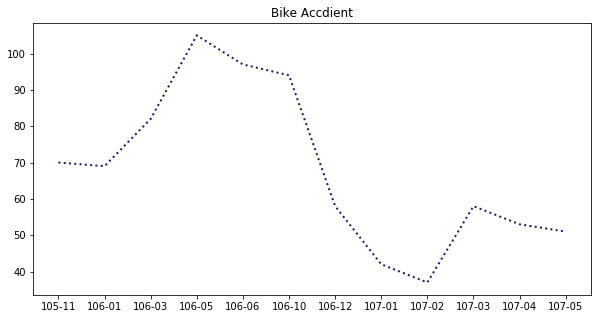

In [9]:
listbikeacc=[list(cars10511)[26],list(cars10601)[-10],list(cars10603)[-11],list(cars10605)[-11],
list(cars10606)[-10],list(cars10610)[-10],list(cars10612)[-12],list(cars10701)[25],list(cars10702)[23],
list(cars10703)[25],list(cars10704)[-9],list(cars10705)[25]]
x = ["105-11","106-01","106-03","106-05","106-06","106-10","106-12","107-01","107-02","107-03","107-04","107-05"]
y = list(listbikeacc)
plt.figure(figsize=(10, 5))
plt.title('Bike Accdient')
plt.plot(x, y, color='midnightblue', linewidth=2.0, linestyle=':')
plt.show()

橫軸為時間，縱軸為事故個數，106年10月後大致呈現下降趨勢。

### 2016.11-2018.5 行人事故件數變化趨勢

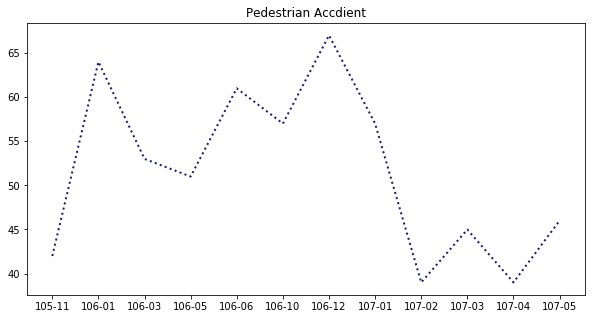

In [10]:
listperacc=[list(cars10511)[-2],list(cars10601)[-3],list(cars10603)[-3],list(cars10605)[-3],list(cars10606)[-3],
list(cars10610)[-3],list(cars10612)[-2],list(cars10701)[-3],list(cars10702)[-3],list(cars10703)[-2],
list(cars10704)[-3],list(cars10705)[-3]]
x = ["105-11","106-01","106-03","106-05","106-06","106-10","106-12","107-01","107-02","107-03","107-04","107-05"]
y = list(listperacc)
plt.figure(figsize=(10, 5))
plt.title('Pedestrian Accdient')
plt.plot(x, y, color='midnightblue', linewidth=2.0, linestyle=':')
plt.show()

橫軸為時間，縱軸為事故個數，106年12月後大致呈現下降趨勢。

### 自行車與行人事故數據觀察

在落實人本綠色交通的兩個具體措施—人本道路空間推動計畫、臺中市自行車道串連計畫—中，筆者期待行人與自行車事故件數將呈減少之趨勢。由105年11月至107年5月之數據（僅分析可取用之資料檔案，故資料並非逐月）來看，自行車與行人的事故件數確實呈現下降之趨勢，唯偶有攀升之情形，且起伏程度不小。

# 六、研究結論與建議

本次報告主要針對三項數據進行分析，以檢視台中市政府交通政策施行成果。從數據中筆者觀察到，行人與自行車事故件數確實如預期呈現下降的趨勢，而公車之運量亦緩慢的上升。唯，本次報告可分析數據之完整性有限，因此建議日後研究者能待政策施行更長的時間後，取得更全面的資料進行分析。